##ВНИМАНИЕ!
Данное задание представляет собой содержит пустые ячейки кода, которые нужно заполнить. Для этого пользуйтесь подсказками-инструкциями в тексте этого документа и своими знаниями о загрузке данных из файла, предобработке данных, разделении данных на признаки и целевую переменную, обучении моделей регрессии и классификации, а также оценке модели на тестовых данных.

#Анализ стоимости жилья в Калифорнии с помощью моделей регрессии

Для выполнения задания сохраните копию файла себе на Google Диск, выполните задания, а потом поделитесь ссылкой на файл в качестве результата. Не забудьте открыть доступ, чтобы можно было проверить правильность выполнения.

###1. Загрузка данных
Загрузите библиотеки Pandas и Scikit-learn, а затем загрузите данные из файлов california_housing_train.csv и california_housing_test.csv. Файлы находятся прямо в виртуальной машине Google Colab. Для загрузки данных используйте функцию read_csv() из библиотеки Pandas.

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
from sklearn import datasets

# Загружаем данные
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')

###2. Предобработка данных
Перед тем как обучать модель линейной регрессии, необходимо выполнить предобработку данных. Для этого выполните следующие шаги:

####2.1 Удалите ненужные столбцы
Для такой простой модели, как линейная регрессия, у нас многовато столбцов. Удалите столбец total_rooms из данных.

In [ ]:
# Удаление столбца total_rooms
train_data = train_data.drop('total_rooms', axis=1)
test_data = test_data.drop('total_rooms', axis=1)

####2.2 Обработка пропущенных значений
Проверьте, есть ли пропущенные значения в данных. Если есть, то заполните их средним значением по столбцу.



In [ ]:
# Проверка наличия пропущенных значений
print(train_data.isnull().sum())
print(test_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [ ]:
# Заполнение пропущенных значений средним значением по столбцу
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

####2.3 Масштабирование данных
Для улучшения производительности модели необходимо масштабировать данные. Масштабируйте данные с помощью функции StandardScaler() из библиотеки Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

###3. Обучение модели
Теперь, когда данные подготовлены, можно приступать к обучению модели линейной регрессии.

####3.1 Разделение данных на признаки и целевую переменную
Разделите обучающие и тестовые данные на признаки (features) и целевую переменную (target). В качестве целевой переменной используйте столбец median_house_value.

In [ ]:
# Разделение данных на признаки и целевую переменную
X_train = train_data_scaled[:, :-1]
y_train = train_data_scaled[:, -1]
X_test = test_data_scaled[:, :-1]
y_test = test_data_scaled[:, -1]

####3.2 Обучение модели
Создайте объект модели линейной регрессии и обучите его на обучающих данных.

In [ ]:
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

LinearRegression()

###4. Оценка модели
Оцените модель на тестовых данных.

In [ ]:
from sklearn.metrics import mean_squared_error

# Предсказание значений на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.3635741071223732


###5. Сравнение с другой моделью

Импортируйте DecisionTreeRegressor. Создайте модель, обучите на обучающей выборке, реализуйте предсказание для тестовых данных, оцените результат. Лучше ли получился результат по сравнению с линейной регрессией?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Создание объекта модели дерева решений
model = DecisionTreeRegressor()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Предсказание значений на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.3304618908980223


#Классификация цветов Ириса

Для выполнения задания сохраните копию файла себе на Google Диск, выполните задания, а потом поделитесь ссылкой на файл в качестве результата. Не забудьте открыть доступ, чтобы можно было проверить правильность выполнения.

###1. Загрузка библиотек
Загрузите библиотеки NumPy, Pandas, Matplotlib и Scikit-learn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###2. Загрузка данных
####2.1 Загрузите датасет Ирисов Фишера из библиотеки Scikit-learn.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

####2.2 Преобразуйте датасет в pandas DataFrame для удобства работы с данными.

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


####2.3 Разделите данные на обучающую и тестовую выборки.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris.target, test_size=0.2, random_state=42)

###3. Анализ данных
####3.1 Выведите первые несколько строк датасета, чтобы посмотреть на данные.

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####3.2 Выведите общую информацию о датасете, такую как количество записей и признаков, названия столбцов и типы данных.

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


####3.3 Используйте метод describe() для получения статистической информации о каждом признаке.

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


####3.4 Визуализируйте данные с помощью диаграмм рассеяния, чтобы увидеть взаимосвязи между признаками.

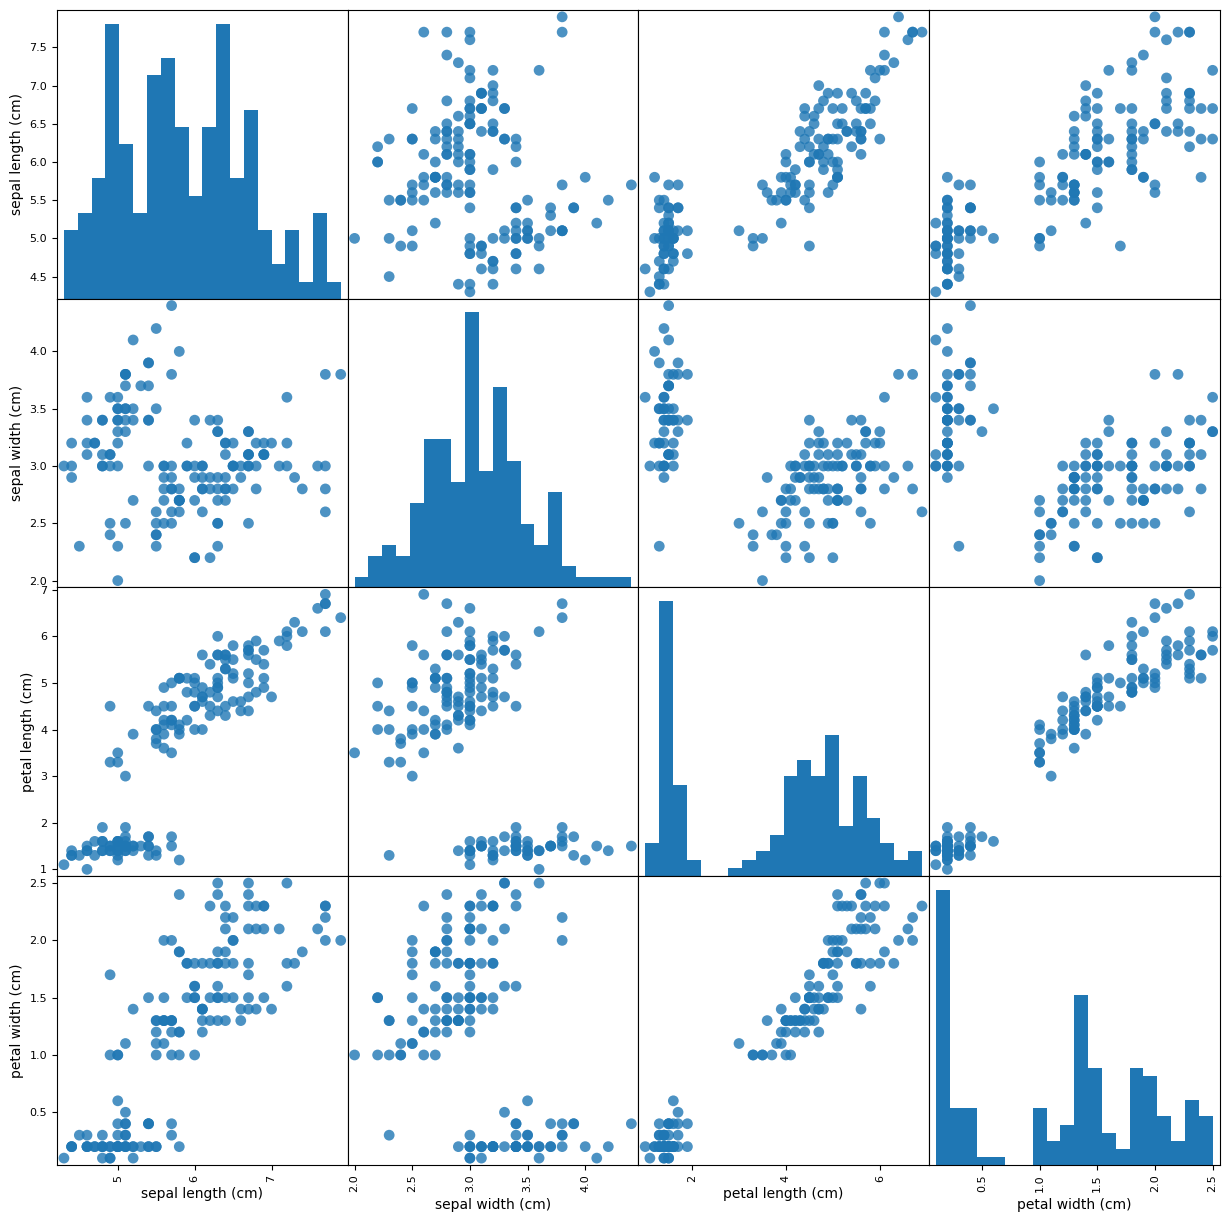

In [ ]:
from pandas.plotting import scatter_matrix

grr = scatter_matrix(iris_df, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

###4. Предобработка данных
#### 4.1 Масштабируйте признаки с помощью метода StandardScaler() из библиотеки Scikit-learn.

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
train_iris_scaled = scaler.fit_transform(X_train)
test_iris_scaled = scaler.transform(X_test)

###5. Обучение модели
####5.1 Создайте объект класса KNeighborsClassifier из библиотеки Scikit-learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

####5.2 Обучите модель на данных для обучения с помощью метода fit().


In [ ]:
model.fit(train_iris_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

###6. Оценка модели
####6.1 Получите прогнозы для данных для обучения и тестирования с помощью метода predict().

In [ ]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

####6.2 Оцените качество модели с помощью метрик точности, полноты и F-меры.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Оценка качества модели с помощью метрик точности, полноты и F-меры
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.36666666666666664
Precision: 0.13444444444444445
Recall: 0.36666666666666664
F1-score: 0.19674796747967477


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####6.3 Визуализируйте матрицу ошибок (confusion matrix) и отчет классификации (classification report) с помощью функции confusion_matrix() и classification_report() из библиотеки Scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Предсказание значений на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Вычисление отчета классификации
cr = classification_report(y_test, y_pred)
print('Classification report:')
print(cr)

Confusion matrix:
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         9
           2       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `